In [1]:
from src.core import DataLoader

In [2]:
import pandas as pd

In [3]:
dl = DataLoader('data/jokes.csv', 'data/rating.csv')

In [4]:
jk = dl.jokes

In [5]:
tg = dl.train_data.groupby("joke_id").mean()

In [6]:
jk['len'] = jk.apply(lambda row: len(row['joke_text']), axis=1)

In [7]:
d = pd.merge(tg, jk, on="joke_id")

<AxesSubplot:xlabel='len', ylabel='Rating'>

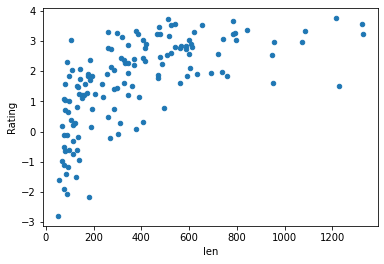

In [8]:
d.plot.scatter(x='len', y='Rating')

In [9]:
dl.train_data

,id,user_id,joke_id,Rating
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
5,5782_14,5782,14,-1.781
6,34059_62,34059,62,6.250
...,...,...,...,...
1092053,4860_62,4860,62,9.000
1092054,9517_132,9517,132,3.156
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


In [10]:
dd = dl.train_data.groupby("user_id").size()

In [11]:
dd.sort_values()

user_id
8001      1
15589     1
15594     2
3343      2
4191      2
         ..
366      78
38269    79
21997    79
233      79
3950     80
Length: 40863, dtype: int64

In [12]:
df = pd.merge(dl.train_data, jk, on="joke_id")

In [13]:
an = df.loc[:, ["user_id", "Rating", "len"]]

In [14]:
r =an.groupby("user_id").mean()

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'len'}>]], dtype=object)

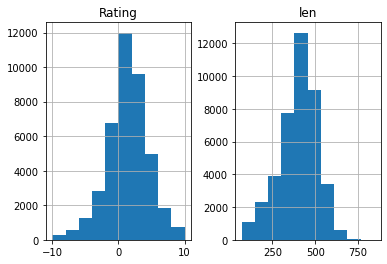

In [15]:
r.hist(bins=10)

<AxesSubplot:xlabel='len', ylabel='Rating'>

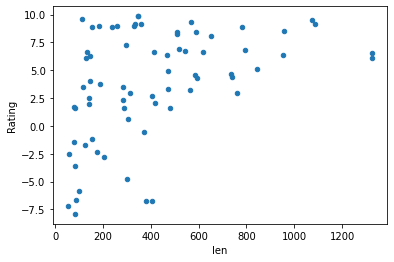

In [16]:
an[an["user_id"] == 367].loc[:, ["Rating", "len"]].plot.scatter(x='len', y='Rating')

<AxesSubplot:xlabel='len', ylabel='Rating'>

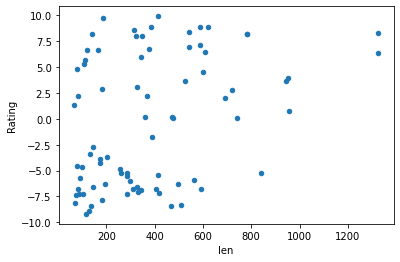

In [17]:
an[an["user_id"] == 233].loc[:, ["Rating", "len"]].plot.scatter(x='len', y='Rating')

<AxesSubplot:xlabel='len', ylabel='Rating'>

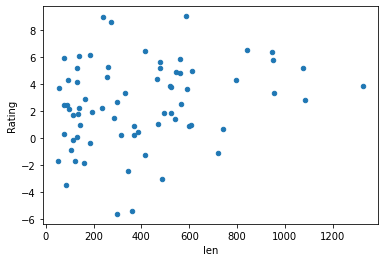

In [18]:
an[an["user_id"] == 16802].loc[:, ["Rating", "len"]].plot.scatter(x='len', y='Rating')

In [19]:
from src.embeddings import BagOfWords, TFIDF, remove_punctuation, Embedding

In [20]:
from src.text_similarity_models import CosineSimilarity, TextSimilarityModel

In [21]:
pre = [remove_punctuation(x) for x in dl.jokes['joke_text']]

In [22]:
emb = BagOfWords(pre)

In [23]:
cos_d = CosineSimilarity(emb)

In [24]:
import numpy as np

In [28]:
from src.full_text_models import FullPreprocessingTFIDFCosineModel, FullPreprocessingBertCosineModel, BertCosineModel

In [29]:
sentences = [
    "My favorite subject is Linux in embedded systems",
    "Linux is very cool",
    "Machine learning is easy",
    "I like chocolate ice creams",
    "Chocolate ice creams are my favorite",
    "I love Linux"
]

In [30]:
model = FullPreprocessingTFIDFCosineModel(sentences)

In [34]:
model.get_similarity(sentences[0], sentences[5])

0.0743345849441918

In [35]:
smart_model = FullPreprocessingBertCosineModel()

In [36]:
sentences

['My favorite subject is Linux in embedded systems',
 'Linux is very cool',
 'Machine learning is easy',
 'I like chocolate ice creams',
 'Chocolate ice creams are my favorite',
 'I love Linux']

In [37]:
smart_model.get_similarity(sentences[1], sentences[4])

0.08075666

In [38]:
without_processing = BertCosineModel()

In [39]:
without_processing.get_similarity(sentences[1], sentences[4])

0.07987223

In [40]:
without_processing.get_similarity("I love fish", "I like fish")

0.84260243

In [41]:
without_processing.get_similarity("The black cat came into the room", "Dark cat is is the room")

0.78983355

In [42]:
smart_model.get_similarity("The black cat came into the room", "Dark cat is is the room")

0.7956541

In [43]:
smart_model.get_similarity("Seals eat fish", "Seals like fish")

0.8735078

In [44]:
jokes = dl.jokes['joke_text'].tolist()

In [45]:
model_1 = FullPreprocessingTFIDFCosineModel(jokes)

In [46]:
model_2 = FullPreprocessingBertCosineModel()

In [47]:
model_3 = BertCosineModel()

In [50]:
model_1.get_similarity(jokes[11], jokes[10])

0.055226924081678105

In [51]:
model_2.get_similarity(jokes[11], jokes[10])

0.18101057

In [52]:
model_3.get_similarity(jokes[11], jokes[10])

0.28632623

In [177]:
df.groupby("user_id").count().sort_values("id")

,id,joke_id,Rating,joke_text,len
user_id,,,,,
8001,1,1,1,1,1
15589,1,1,1,1,1
15594,2,2,2,2,2
3343,2,2,2,2,2
4191,2,2,2,2,2
...,...,...,...,...,...
366,78,78,78,78,78
38269,79,79,79,79,79
21997,79,79,79,79,79


In [178]:
dff = df[df["user_id"] == 3950].loc[:, ["Rating", "joke_text", "joke_id"]]

In [54]:
dff.sort_values("Rating")

,Rating,joke_text
809564,-9.188,Did you hear about the Buddhist who refused No...
775437,-8.938,How many Irishmen does it take to change a lig...
362863,-8.469,"When most people claim to be ""killing time"", i..."
129052,-8.438,"A Briton, a Frenchman and a Russian are viewin..."
730121,-8.375,"An astronomer, a physicist and a mathematician..."
...,...,...
252986,8.844,A guy goes into confession and says to the pri...
198282,8.844,An American tourist goes into a restaurant in ...
451542,8.875,A group of managers were given the assignment ...
175444,9.781,"A little girl asked her father, ""Daddy? Do all..."


In [57]:
df

,id,user_id,joke_id,Rating,joke_text,len
0,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....,56
1,18_6,18,6,-8.250,Q. What is orange and sounds like a parrot? A....,56
2,32451_6,32451,6,0.562,Q. What is orange and sounds like a parrot? A....,56
3,20518_6,20518,6,-4.219,Q. What is orange and sounds like a parrot? A....,56
4,11438_6,11438,6,-4.625,Q. What is orange and sounds like a parrot? A....,56
...,...,...,...,...,...,...
873642,446_90,446,90,-1.969,Q: Whats the difference between greeting a que...,153
873643,262_90,262,90,1.812,Q: Whats the difference between greeting a que...,153
873644,100_90,100,90,2.062,Q: Whats the difference between greeting a que...,153
873645,464_90,464,90,-0.344,Q: Whats the difference between greeting a que...,153


In [59]:
from sklearn.cluster import dbscan

In [77]:
model_1.get_similarity(jokes[1], jokes[6])

0.5204454576736337

In [84]:
def metric(x: int, y: int):
    return 1 - model_3.get_similarity(jokes[int(x[0])], jokes[int(y[0])])

X = np.arange(len(jokes)).reshape(-1, 1)
dbscan(X, metric=metric, eps=0.6, min_samples=2)

(array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  29,
         31,  33,  34,  35,  36,  37,  38,  39,  41,  42,  45,  47,  50,
         51,  52,  54,  55,  57,  58,  59,  60,  61,  62,  63,  65,  67,
         69,  70,  71,  72,  73,  74,  75,  76,  79,  80,  81,  82,  83,
         85,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 129, 131,
        132, 133, 134, 135, 136, 137]),
 array([-1,  0,  1,  1,  1,  2,  0,  1,  3, -1,  1,  1,  2, -1,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1, -1,  0, -1,  1, -1,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  0, -1, -1,  1,
         1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,
        -1,  1,  1,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  1,  1, 

In [133]:
def metric(x: int, y: int):
    return 1 - model_2.get_similarity(jokes[int(x[0])], jokes[int(y[0])])

X = np.arange(len(jokes)).reshape(-1, 1)
dbscan(X, metric=metric, eps=0.6, min_samples=2)

(array([  1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  15,  16,  17,
         18,  20,  21,  23,  24,  25,  26,  27,  28,  29,  31,  33,  34,
         35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  47,  50,  51,
         52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  70,
         74,  75,  76,  79,  80,  81,  82,  85,  86,  92,  93,  94,  95,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 112, 113, 114, 116, 117, 118, 119, 120, 122, 123, 124, 125,
        129, 131, 132, 133, 134, 135, 136, 137, 138]),
 array([-1,  0,  1,  1,  1,  2,  0,  1,  1, -1, -1,  1,  2, -1, -1,  1,  1,
         1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,
         1,  1,  1,  1,  1,  1, -1,  3,  1,  1,  1,  1, -1,  0, -1, -1,  1,
         1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  0, -1,  1, -1, -1,
        -1, -1,  1, -1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1,  1, -1, -1,
         1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1

In [127]:
jokes[4]

'Q: What did the blind person say when given some matzah? A: Who the hell wrote this?'

In [126]:
jokes[3]

'They asked the Japanese visitor if they have elections in his country. "Every morning," he answers.'

In [119]:
dff[dff['joke_text'] == jokes[112]]

,Rating,joke_text,joke_id
362863,-8.469,"When most people claim to be ""killing time"", i...",113


In [159]:
dff

,Rating,joke_text,joke_id
26679,-6.594,Two attorneys went into a diner and ordered tw...,86
57488,-6.250,Q: If a person who speaks three languages is c...,9
67897,3.094,Two men are discussing the age old question: w...,32
86239,-4.562,Q: What is the Australian word for a boomerang...,13
88992,-5.688,Chuck Norris' calendar goes straight from Marc...,130
...,...,...,...
871310,-6.781,America: 8:00 - Welcome to work! 12:00 - Lunch...,136
872360,-7.312,Q. What's O. J. Simpson's web address? A. Slas...,1
872604,-5.281,President Clinton looks up from his desk in th...,21
873069,-7.281,Q: What do Monica Lewinsky and Bob Dole have i...,42


In [96]:
d = np.array([-1,  0,  1,  1,  1,  2,  0,  1,  3, -1,  1,  1,  2, -1,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1, -1,  0, -1,  1, -1,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  0, -1, -1,  1,
         1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,
        -1,  1,  1,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  1,  1, -1,
         1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,
         1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  4, -1,  1,  1,  1,  1,  1,
         1,  1, -1])

In [161]:
len(d)

139

In [179]:
categorized = dff[dff['joke_id'] < 139]

In [185]:
categorized['category'] = categorized.apply(lambda x: d[x['joke_id']], axis=1)
categorized['len'] = categorized.apply(lambda x: len(x['joke_text']), axis=1)

In [187]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(categorized.loc[:, ['Rating', 'category', 'joke_id', 'len']].sort_values('Rating'))

        Rating  category  joke_id   len
7430    -4.688         0        6    56
463533  -3.625         1        2    75
794442  -3.312         1       72   139
111252  -2.656        -1       44   956
314160  -2.500         1        4    99
87556   -2.344        -1      130    93
418272  -2.031         1       75   122
83891   -2.031        -1       13    80
226761  -2.000         1      124   480
775309  -1.469        -1       30   129
250426  -1.000        -1       53   600
796351  -0.938         1       67    80
827474  -0.656        -1       77   414
713616  -0.250         1       69   114
302379   0.438         1        7    81
168701   0.625         1       24   284
574531   0.812         3       22   652
770844   1.062         1       98   260
647049   1.062         1       99   273
641150   1.344         1      100   416
864724   1.406         1       20    97
334648   1.438         1       25   543
837797   1.562         1       80    97
405780   1.594         3        8   302


In [182]:
[jokes[111], jokes[37], jokes[68], jokes[107], jokes[81], jokes[57]]

['An astronomer, a physicist and a mathematician (it is said) were holidaying in Scotland. Glancing from a train window, they observed a black sheep in the middle of a field. "How interesting," observed the astronomer, "All Scottish sheep are black!" To which the physicist responded, "No, no! Some Scottish sheep are black!" The mathematician gazed heavenward in supplication, and then intoned, "In Scotland there exists at least one field, containing at least one sheep, at least one side of which is black."',
 'The graduate with a Science degree asks, "Why does it work?" The graduate with an Engineering degree asks, "How does it work?" The graduate with an Accounting degree Asks, "How much will it cost?" The graduate with a Liberal Arts degree asks, "Do you want fries with that?"',
 'Q: Ever wonder why the IRS calls it Form 1040? A: Because for every $50 that you earn, you get 10 and they get 40.',
 'A man goes into a drug store and asks the pharmacist if he can give him something for th

In [183]:
jokes[6]

'How many men does it take to screw in a light bulb? One. Men will screw anything.'